In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import plotly_express as px
import plotly.graph_objs as go

In [2]:
file = "Resources/Air Quality Data.csv"
air_data = pd.read_csv(file)

In [3]:
air_data.head()

,exposure_id,type,country,iso3,region,name,exp_lower,exp_mean,exp_upper,year4,pollutant,pollutant_name_en,region_name_en,measure
0,22754.0,country,Afghanistan,AFG,region,North Africa and Middle East,59.0,61.0,63.0,1990.0,pm25,PM25,GBD Regions,µg/m3
1,5130.0,country,Afghanistan,AFG,country,Afghanistan,59.0,61.0,63.0,1990.0,pm25,PM25,Country,µg/m3
2,22755.0,country,Afghanistan,AFG,region,North Africa and Middle East,54.0,56.0,58.0,1995.0,pm25,PM25,GBD Regions,µg/m3
3,5131.0,country,Afghanistan,AFG,country,Afghanistan,54.0,56.0,58.0,1995.0,pm25,PM25,Country,µg/m3
4,22753.0,country,Afghanistan,AFG,region,North Africa and Middle East,54.0,56.0,58.0,2000.0,pm25,PM25,GBD Regions,µg/m3


In [4]:
air_data.count()

exposure_id          770
type                 771
country              771
iso3                 770
region               770
name                 770
exp_lower            770
exp_mean             770
exp_upper            770
year4                770
pollutant            770
pollutant_name_en    770
region_name_en       770
measure              770
dtype: int64

In [5]:
air_data_cleaned = air_data.dropna(how="any")
air_data_cleaned.count()

exposure_id          770
type                 770
country              770
iso3                 770
region               770
name                 770
exp_lower            770
exp_mean             770
exp_upper            770
year4                770
pollutant            770
pollutant_name_en    770
region_name_en       770
measure              770
dtype: int64

In [6]:
air_data_cleaned.head()

,exposure_id,type,country,iso3,region,name,exp_lower,exp_mean,exp_upper,year4,pollutant,pollutant_name_en,region_name_en,measure
0,22754.0,country,Afghanistan,AFG,region,North Africa and Middle East,59.0,61.0,63.0,1990.0,pm25,PM25,GBD Regions,µg/m3
1,5130.0,country,Afghanistan,AFG,country,Afghanistan,59.0,61.0,63.0,1990.0,pm25,PM25,Country,µg/m3
2,22755.0,country,Afghanistan,AFG,region,North Africa and Middle East,54.0,56.0,58.0,1995.0,pm25,PM25,GBD Regions,µg/m3
3,5131.0,country,Afghanistan,AFG,country,Afghanistan,54.0,56.0,58.0,1995.0,pm25,PM25,Country,µg/m3
4,22753.0,country,Afghanistan,AFG,region,North Africa and Middle East,54.0,56.0,58.0,2000.0,pm25,PM25,GBD Regions,µg/m3


In [7]:
air_df = air_data_cleaned.loc[:, 
                              ["country", "iso3", "region", "name", "exp_lower", "exp_mean",
                                              "exp_upper", "year4", "pollutant", "measure"]]
air_df.head()

,country,iso3,region,name,exp_lower,exp_mean,exp_upper,year4,pollutant,measure
0,Afghanistan,AFG,region,North Africa and Middle East,59.0,61.0,63.0,1990.0,pm25,µg/m3
1,Afghanistan,AFG,country,Afghanistan,59.0,61.0,63.0,1990.0,pm25,µg/m3
2,Afghanistan,AFG,region,North Africa and Middle East,54.0,56.0,58.0,1995.0,pm25,µg/m3
3,Afghanistan,AFG,country,Afghanistan,54.0,56.0,58.0,1995.0,pm25,µg/m3
4,Afghanistan,AFG,region,North Africa and Middle East,54.0,56.0,58.0,2000.0,pm25,µg/m3


In [8]:
region_df = air_df.loc[air_df["region"] == "region", :]

In [9]:
region_df.head()

,country,iso3,region,name,exp_lower,exp_mean,exp_upper,year4,pollutant,measure
0,Afghanistan,AFG,region,North Africa and Middle East,59.0,61.0,63.0,1990.0,pm25,µg/m3
2,Afghanistan,AFG,region,North Africa and Middle East,54.0,56.0,58.0,1995.0,pm25,µg/m3
4,Afghanistan,AFG,region,North Africa and Middle East,54.0,56.0,58.0,2000.0,pm25,µg/m3
7,Afghanistan,AFG,region,North Africa and Middle East,42.0,43.0,45.0,2005.0,pm25,µg/m3
9,Afghanistan,AFG,region,North Africa and Middle East,45.0,47.0,48.0,2010.0,pm25,µg/m3


In [10]:
region_group = region_df.groupby(["year4","name"])

In [11]:
region_group.head(11)

,country,iso3,region,name,exp_lower,exp_mean,exp_upper,year4,pollutant,measure
0,Afghanistan,AFG,region,North Africa and Middle East,59.0,61.0,63.0,1990.0,pm25,µg/m3
2,Afghanistan,AFG,region,North Africa and Middle East,54.0,56.0,58.0,1995.0,pm25,µg/m3
4,Afghanistan,AFG,region,North Africa and Middle East,54.0,56.0,58.0,2000.0,pm25,µg/m3
7,Afghanistan,AFG,region,North Africa and Middle East,42.0,43.0,45.0,2005.0,pm25,µg/m3
9,Afghanistan,AFG,region,North Africa and Middle East,45.0,47.0,48.0,2010.0,pm25,µg/m3
10,Afghanistan,AFG,region,North Africa and Middle East,49.0,50.0,52.0,2011.0,pm25,µg/m3
12,Afghanistan,AFG,region,North Africa and Middle East,49.0,51.0,53.0,2012.0,pm25,µg/m3
15,Afghanistan,AFG,region,North Africa and Middle East,49.0,51.0,53.0,2013.0,pm25,µg/m3
17,Afghanistan,AFG,region,North Africa and Middle East,48.0,49.0,51.0,2014.0,pm25,µg/m3
18,Afghanistan,AFG,region,North Africa and Middle East,60.0,62.0,64.0,2015.0,pm25,µg/m3


In [12]:
region_group.median()

exp_lower  exp_mean  exp_upper
year4  name                                                        
1990.0 Central Asia                       19.0      21.0       29.0
       Central Europe                     34.0      36.0       37.0
       Central Latin America              29.0      32.0       34.0
       East Asia                          28.0      31.0       34.0
       High-income North America           8.0       8.0        8.0
       North Africa and Middle East       49.0      54.0       60.0
       South Asia                         60.0      60.0       60.0
       Southern Sub-Saharan Africa        24.0      26.0       29.0
1995.0 Central Asia                       16.0      17.0       24.0
       Central Europe                     25.0      26.0       27.0
       Central Latin America              28.0      29.0       30.0
       East Asia                          28.0      30.0       34.0
       High-income North America           8.0       8.0        8.0
       North Africa and Middle East       49.0      53.0       58.0
       South Asia                         60.0      61.0       61.0
       Southern Sub-Saharan Africa        23.0      25.5       29.0
2000.0 Central Asia                       18.0      19.0       25.0
       Central Europe                     21.0      21.0       22.0
       Central Latin America              30.0      33.0       35.0
       East Asia                          29.0      31.0       34.0
       High-income North America           8.0       8.0        8.0
       North Africa and Middle East       49.0      54.0       58.0
       South Asia                         61.0      61.0       62.0
       Southern Sub-Saharan Africa        23.5      27.5       32.5
2005.0 Central Asia                       17.0      21.0       24.0
       Central Europe                     19.0      19.0       20.0
       Central Latin America              28.0      29.0       30.0
       East Asia                          30.0      32.0       35.0
       High-income North America           8.0       8.0        8.0
       North Africa and Middle East       42.0      43.0       51.0
...                                        ...       ...        ...
2013.0 Central Latin America              24.0      25.0       26.0
       East Asia                          29.0      32.0       34.0
       High-income North America           7.0       7.0        7.0
       North Africa and Middle East       52.0      55.0       58.0
       South Asia                         67.0      69.0       69.0
       Southern Sub-Saharan Africa        19.0      22.5       26.5
2014.0 Central Asia                       21.0      25.0       33.0
       Central Europe                     20.0      21.0       21.0
       Central Latin America              23.0      24.0       25.0
       East Asia                          30.0      33.0       36.0
       High-income North America           7.0       7.0        7.0
       North Africa and Middle East       48.0      53.0       55.0
       South Asia                         68.0      72.0       72.0
       Southern Sub-Saharan Africa        19.0      22.5       26.5
2015.0 Central Asia                       27.0      29.0       37.0
       Central Europe                     19.0      20.0       21.0
       Central Latin America              20.0      23.0       28.0
       East Asia                          33.0      36.0       39.0
       High-income North America           7.0       8.0        8.0
       North Africa and Middle East       61.0      64.0       69.0
       South Asia                         74.0      76.0       77.0
       Southern Sub-Saharan Africa        22.0      25.0       30.5
2016.0 Central Asia                       28.0      30.0       38.0
       Central Europe                     19.0      20.0       21.0
       Central Latin America              20.0      23.0       27.0
       East Asia                          33.0      36.0       39.0
       High-income North 

In [13]:
region_mean = region_group.mean()
region_mean

exp_lower   exp_mean  exp_upper
year4  name                                                         
1990.0 Central Asia                  28.777778  31.555556  35.444444
       Central Europe                33.153846  34.615385  35.769231
       Central Latin America         27.111111  28.666667  30.777778
       East Asia                     34.000000  35.333333  37.000000
       High-income North America      8.000000   8.333333   8.666667
       North Africa and Middle East  49.238095  52.476190  56.380952
       South Asia                    56.600000  57.800000  59.000000
       Southern Sub-Saharan Africa   25.000000  26.666667  29.166667
1995.0 Central Asia                  24.555556  26.888889  30.222222
       Central Europe                25.769231  26.769231  27.615385
       Central Latin America         27.000000  28.555556  30.555556
       East Asia                     34.333333  35.666667  37.333333
       High-income North America      8.000000   8.333333   8.666667
       North Africa and Middle East  47.761905  50.666667  54.619048
       South Asia                    56.800000  58.200000  59.600000
       Southern Sub-Saharan Africa   24.666667  26.666667  29.333333
2000.0 Central Asia                  24.666667  27.555556  32.000000
       Central Europe                22.615385  23.384615  24.307692
       Central Latin America         28.444444  30.333333  33.111111
       East Asia                     36.000000  37.666667  39.000000
       High-income North America      8.000000   8.333333   8.666667
       North Africa and Middle East  48.000000  51.666667  56.380952
       South Asia                    57.200000  58.600000  60.200000
       Southern Sub-Saharan Africa   25.166667  27.833333  31.833333
2005.0 Central Asia                  20.333333  22.777778  26.777778
       Central Europe                20.230769  20.846154  21.615385
       Central Latin America         27.111111  28.888889  31.111111
       East Asia                     38.666667  40.333333  41.666667
       High-income North America      7.666667   8.000000   8.333333
       North Africa and Middle East  44.666667  48.190476  52.238095
...                                        ...        ...        ...
2013.0 Central Latin America         24.000000  25.666667  27.666667
       East Asia                     38.000000  39.666667  40.666667
       High-income North America      6.666667   7.000000   7.333333
       North Africa and Middle East  52.809524  57.047619  62.190476
       South Asia                    67.600000  69.200000  71.400000
       Southern Sub-Saharan Africa   20.333333  22.833333  26.500000
2014.0 Central Asia                  24.888889  27.888889  33.000000
       Central Europe                23.153846  24.307692  25.307692
       Central Latin America         23.666667  25.222222  27.444444
       East Asia                     39.000000  40.333333  42.000000
       High-income North America      6.666667   7.000000   7.333333
       North Africa and Middle East  51.666667  55.619048  60.476190
       South Asia                    67.600000  69.800000  71.800000
       Southern Sub-Saharan Africa   20.500000  23.000000  26.833333
2015.0 Central Asia                  29.000000  32.444444  37.777778
       Central Europe                22.076923  22.923077  24.000000
       Central Latin America         21.777778  23.444444  25.222222
       East Asia                     39.000000  40.333333  42.333333
       High-income North America      6.666667   7.000000   7.333333
       North Africa and Middle East  65.619048  70.666667  76.619048
       South Asia                    74.800000  77.000000  79.600000
       Southern Sub-Saharan Africa   23.833333  26.500000  30.833333
2016.0 Central Asia                  29.111111  32.777778  38.333333
       Central Europe                21.923077  22.923077  24.000000
       Central Latin America         21.777778  23.222222  24.888889
       East Asia                   

In [14]:
region_mean2 = region_mean.reset_index()
region_mean2

,year4,name,exp_lower,exp_mean,exp_upper
0,1990.0,Central Asia,28.777778,31.555556,35.444444
1,1990.0,Central Europe,33.153846,34.615385,35.769231
2,1990.0,Central Latin America,27.111111,28.666667,30.777778
3,1990.0,East Asia,34.000000,35.333333,37.000000
4,1990.0,High-income North America,8.000000,8.333333,8.666667
5,1990.0,North Africa and Middle East,49.238095,52.476190,56.380952
6,1990.0,South Asia,56.600000,57.800000,59.000000
7,1990.0,Southern Sub-Saharan Africa,25.000000,26.666667,29.166667
8,1995.0,Central Asia,24.555556,26.888889,30.222222
9,1995.0,Central Europe,25.769231,26.769231,27.615385


In [15]:
region_drop_duplicates = region_mean2.drop_duplicates("name")
region_names = region_drop_duplicates["name"]
region_names

0                    Central Asia
1                  Central Europe
2           Central Latin America
3                       East Asia
4       High-income North America
5    North Africa and Middle East
6                      South Asia
7     Southern Sub-Saharan Africa
Name: name, dtype: object

In [16]:
plot_list = []
plt.figure(figsize=(30,15))
for region in region_names:
    region_plot = plt.plot(region_mean2.loc[region_mean2["name"] == region, "year4"], 
                                              region_mean2.loc[region_mean2["name"] == region, "exp_mean"],
                          linewidth=4, marker='o', markersize=10)
    plot_list.append(region_plot)

font = {'weight' : 'bold',
        'size'   : 20}

plt.xlabel("Year")
plt.ylabel("Average Particulate Matter (µg/m3)")
plt.legend(region_names, loc='upper left',prop={'size': 20})
plt.ylim(0,region_mean2["exp_mean"].max() + 25)
plt.xlim(region_mean2["year4"].min(), region_mean2["year4"].max())
plt.rc('font', **font)
plt.grid()
plt.show()


Text(0, 0.5, 'Average Particulate Matter (µg/m3)')

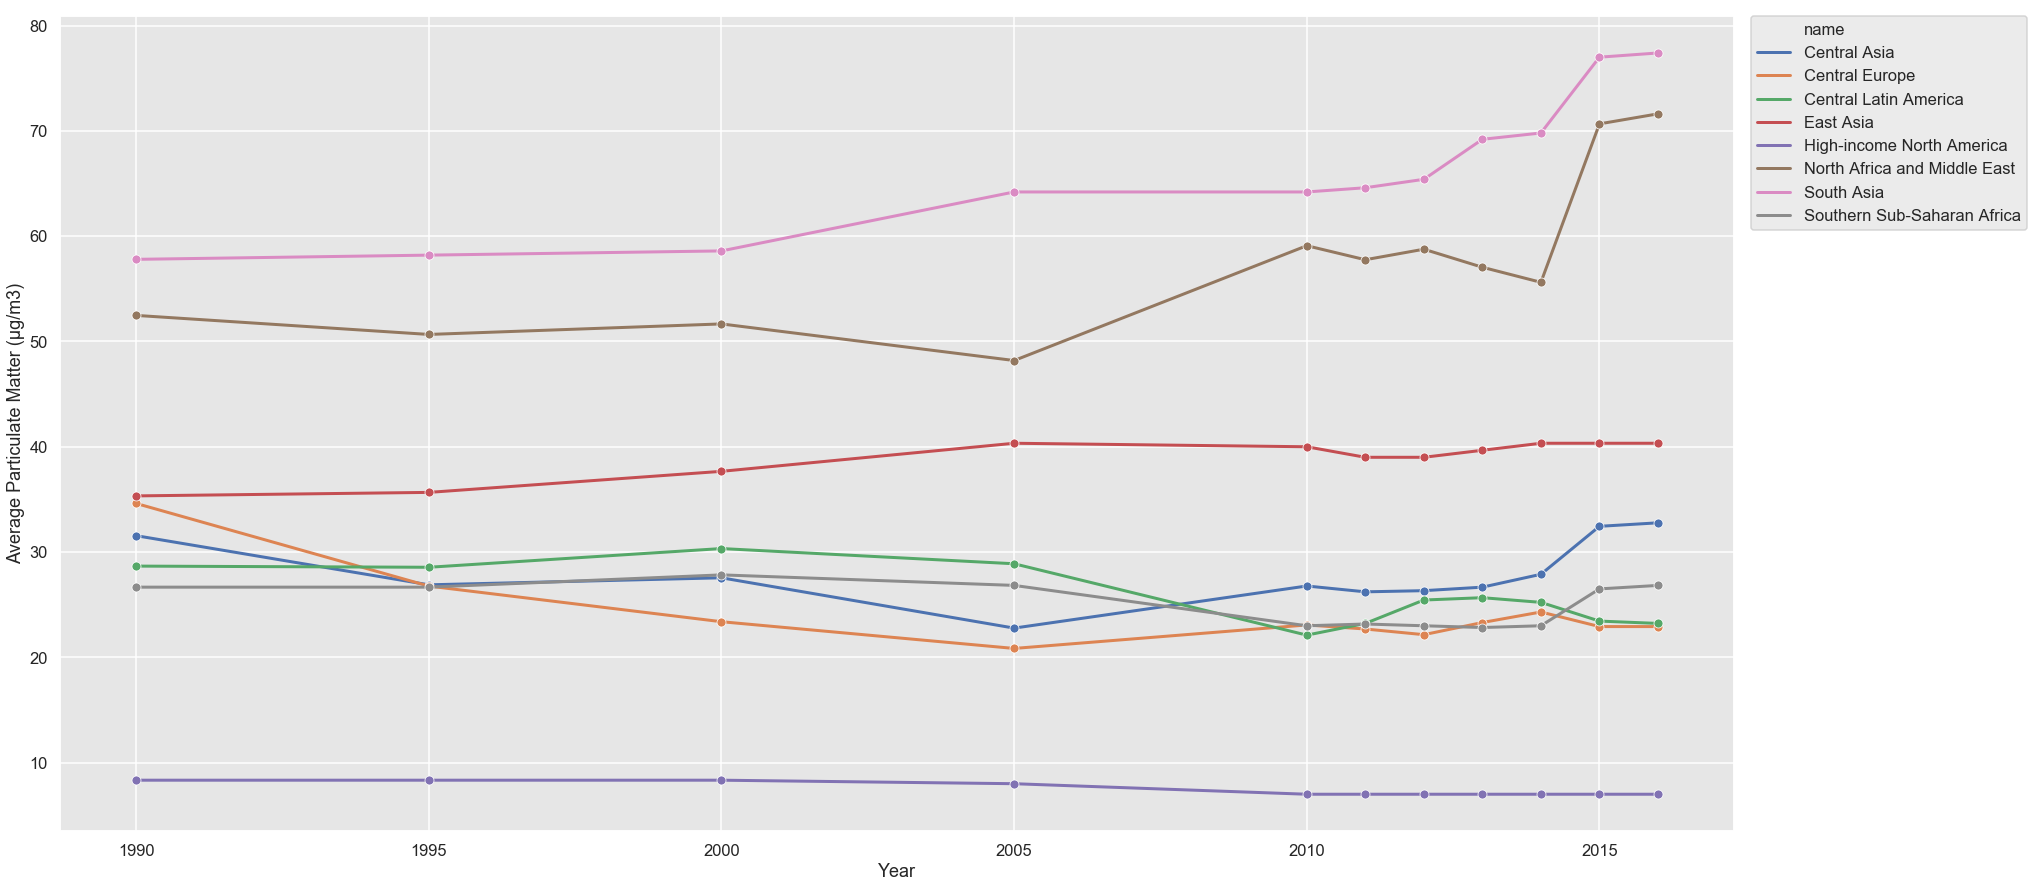

In [35]:

# plt.figure(figsize=(30,15))
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# sns.set_context("talk",rc={"lines.linewidth": 3})
# sns.lineplot(x="year4", y="exp_mean", data=region_mean2, hue="name", marker="o")

# plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
# plt.xlabel("Year")
# plt.ylabel("Average Particulate Matter (µg/m3)")


In [47]:
layout = go.Layout(
    title='Air Pollution by Region (1990-2016)',
    xaxis=dict(
        title='Year',
        titlefont=dict(
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Average Particulate Matter (µg/m3)',
        titlefont=dict(
            size=18,
            color='#7f7f7f'
        )
    )
)
px.line(region_mean2, x="year4", y="exp_mean", color="name")
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig, filename='styling-names')